<a href="https://colab.research.google.com/github/vigneshwarjayabal/Data_Cleaning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Cleaning using Pandas and Python**

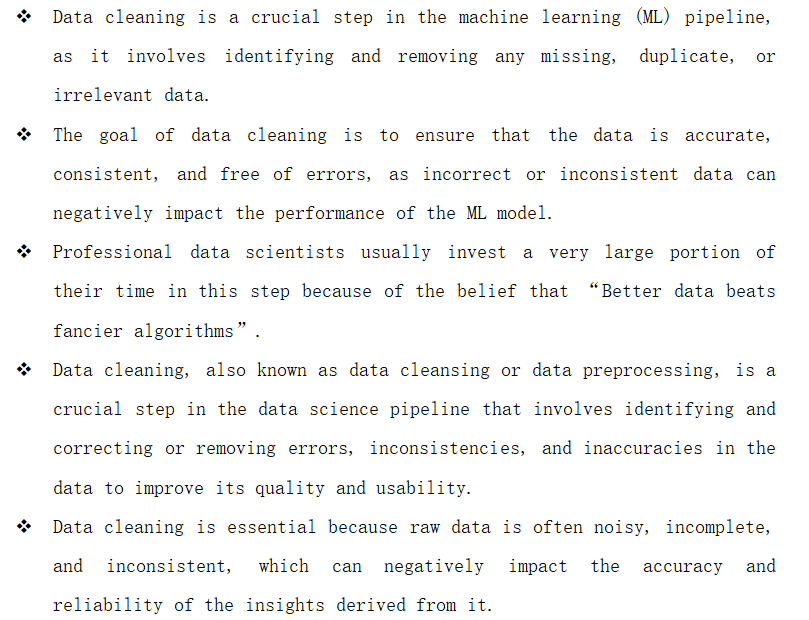

In [ ]:
#steps for data cleaning
#1 data availability / data understanding
#2 spell check
#3 handling null and duplicate values
#4 handling data types and duplicate after conversion
#5 date time conversion(1. convert into pandas understandable format  2.handling based on senario)
#6 convert object and string into meaning full numeric values(for mechinelearning purpose)
#7 outlier data remove the data logically incorrect
#8 correlation,hypothisis
#9 skewness and kurtosis
#10 actual ML and DL

#**Step1: Data Availability / Data Understanding**

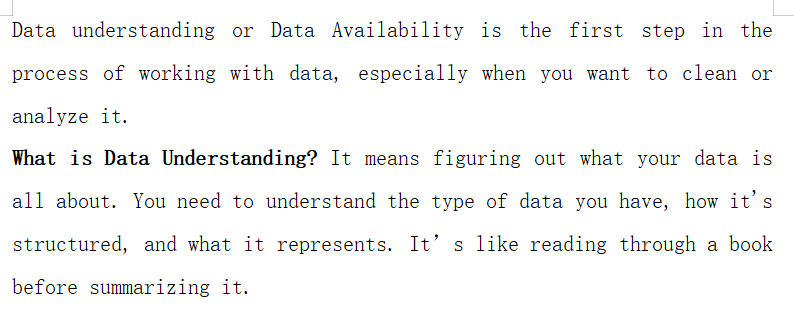

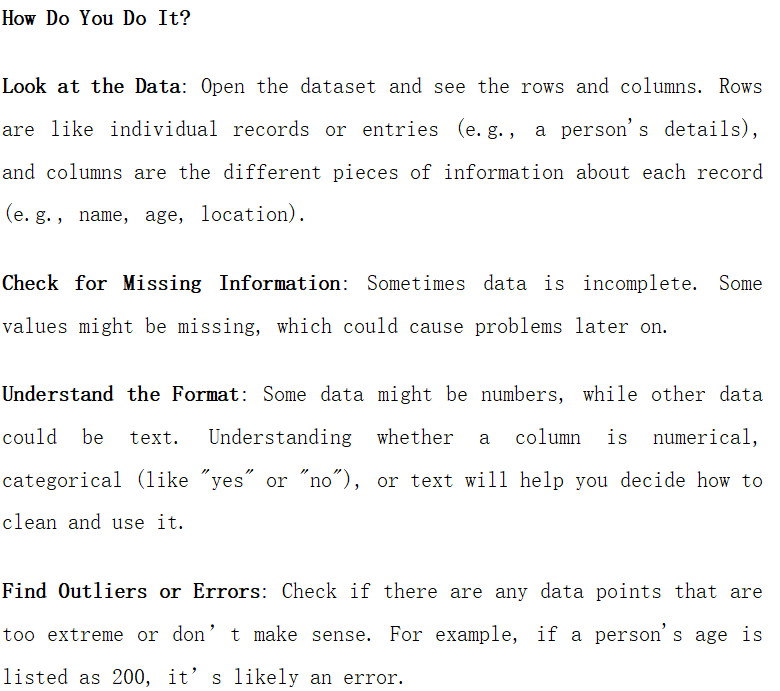

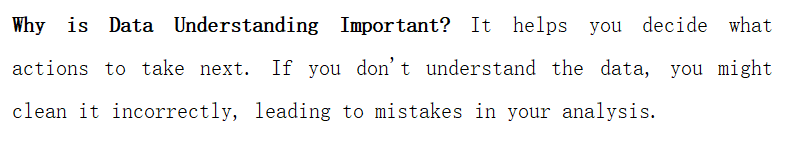

In [ ]:
import pandas as pd

chennai_sales = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')

pd.set_option("display.max_column",None)

In [ ]:
chennai_sales

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
chennai_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#**Step 2: Spell Check**

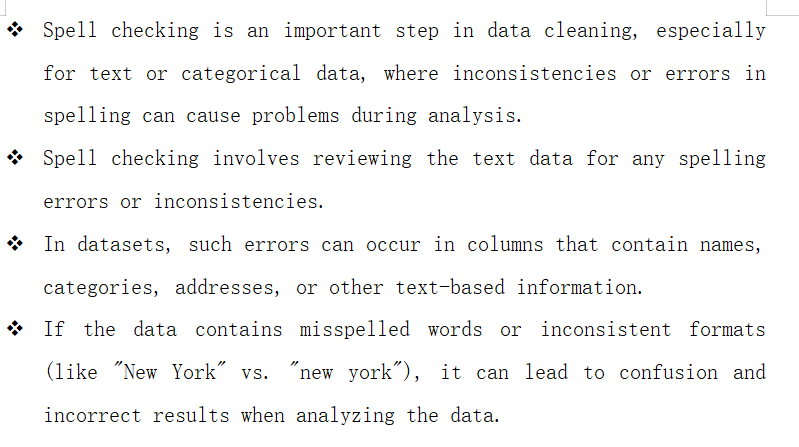

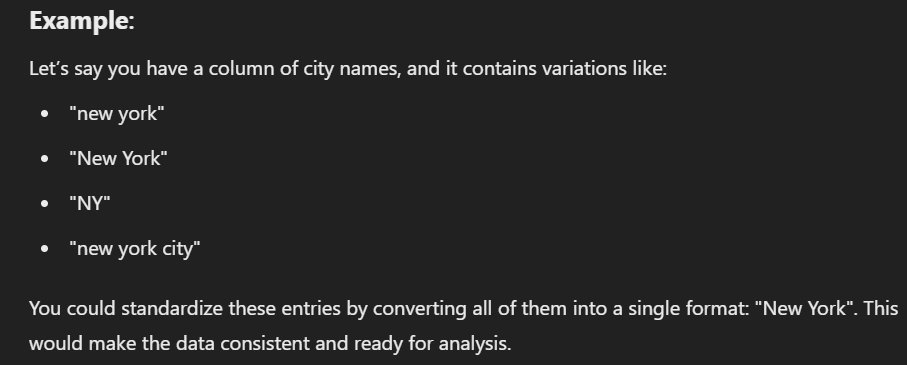

In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
# '''In above area Column we see incorrect spelling for few area like Anna Nagar --> Ann Nagar, Ana Anagr
# this will make data inconsistencies due to error in spelling.'''



In [ ]:
chennai_sales['AREA'] = chennai_sales["AREA"].apply(lambda i:"Anna Nagar" if (i == "Ann Nagar" or i == "Ana Nagar") else i)

# ''' This code will iterate each row in area column if it see Ann Nagar, Ana Anagr spelling then it will replace it with Anna Nager.
# so now i am going to do this to all area name in area column.'''

In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Chormpet', 'Adyr', 'Velchery', 'KKNagar'], dtype=object)

In [ ]:
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Karapakkam" if (i == "Karapakam" ) else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Adyar" if (i == "Adyr") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Velachery" if (i == "Velchery") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Chrompet" if (i == "Chrompt" or i == "Chrmpet" or i =="Chormpet") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"KK Nagar" if (i == "KKNagar") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"T Nagar" if (i == "TNagar") else i)


In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
# ''' before spell check we had 17 unique values in area column but after correct then spelling we have only 7 unique value in area column.
# spell check is important to solve data inconsistent'''

In [ ]:
chennai_sales

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Area
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,Karapakkam
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,Anna Nagar
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,Adyar
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,Velachery
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,Karapakkam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,Karapakkam
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,Velachery
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,Velachery
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,Karapakkam


In [ ]:
chennai_sales['DATE_SALE']=pd.to_datetime(chennai_sales["DATE_SALE"],format="%d-%m-%Y")
chennai_sales['DATE_BUILD']=pd.to_datetime(chennai_sales["DATE_BUILD"],format="%d-%m-%Y")


In [ ]:
chennai_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
chennai_sales.set_index("PRT_ID",inplace=True)

In [ ]:
for i in chennai_sales.select_dtypes(include=["object"]).columns:
  print(i,chennai_sales[i].unique())

AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
PARK_FACIL ['Yes' 'No' 'Noo']
BUILDTYPE ['Commercial' 'Others' 'Other' 'House' 'Comercial']
UTILITY_AVAIL ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
STREET ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']
Area ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Chormpet' 'Adyr'
 'Velchery' 'KKNagar']


In [ ]:
# solving error for remaining column

chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"AbNormal" if (i == "Ab Normal") else i)
chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"Partial" if (i == "Partiall" or i == "PartiaLl") else i)
chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"AdjLand" if (i == "Adj Land") else i)
chennai_sales['PARK_FACIL']=chennai_sales["PARK_FACIL"].apply(lambda i:"No" if (i == "Noo") else i)
chennai_sales['BUILDTYPE']=chennai_sales["BUILDTYPE"].apply(lambda i:"Commercial" if (i == "Comercial") else i)
chennai_sales['BUILDTYPE']=chennai_sales["BUILDTYPE"].apply(lambda i:"Others" if (i == "Other") else i)
chennai_sales['UTILITY_AVAIL']=chennai_sales["UTILITY_AVAIL"].apply(lambda i:"No sewage" if (i == "NoSewr " or i == "NoSeWa") else i)  #sewage
chennai_sales['UTILITY_AVAIL']=chennai_sales["UTILITY_AVAIL"].apply(lambda i:"AllPub" if (i == "All Pub") else i)
chennai_sales['STREET']=chennai_sales['STREET'].apply(lambda i:"Paved" if ( i == "Pavd") else i )
chennai_sales['STREET']=chennai_sales['STREET'].apply(lambda i:"No Access" if ( i == "NoAccess") else i )

In [ ]:
chennai_sales.drop('Area', axis=1, inplace=True)

In [ ]:
for i in chennai_sales.select_dtypes(include=["object"]).columns:
  print(i,chennai_sales[i].unique())

AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
PARK_FACIL ['Yes' 'No']
BUILDTYPE ['Commercial' 'Others' 'House']
UTILITY_AVAIL ['AllPub' 'ELO' 'No sewage']
STREET ['Paved' 'Gravel' 'No Access']
MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']


#**Step 3: Handling null and duplicate values**

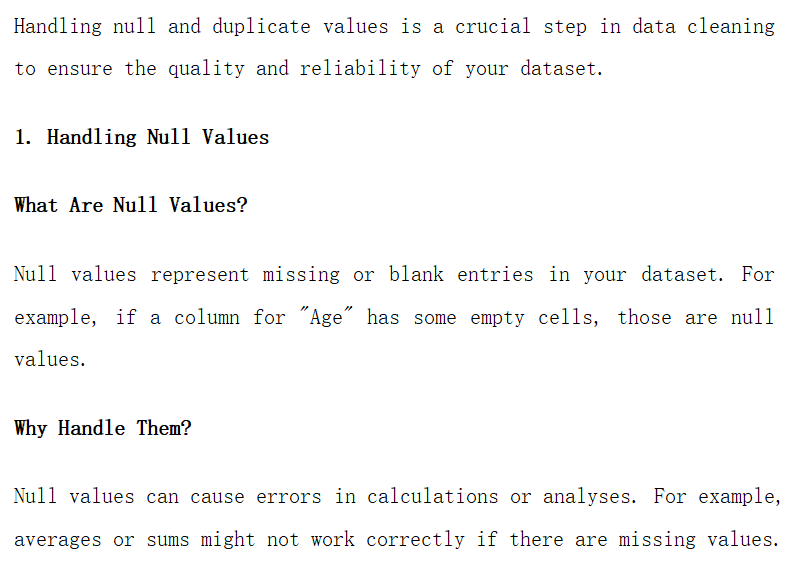

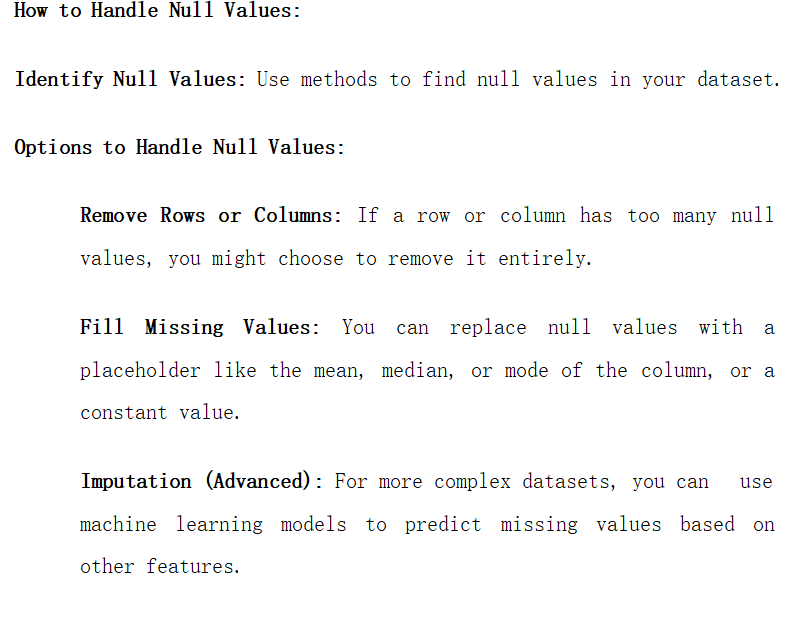

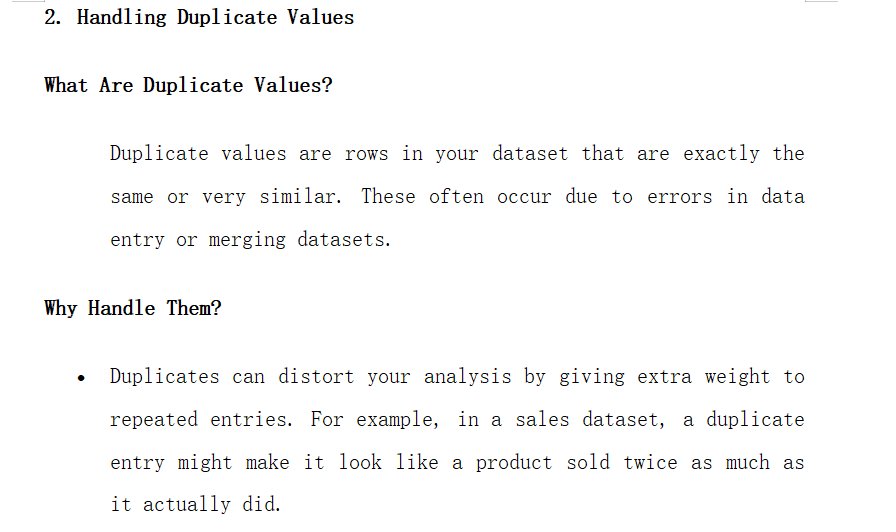

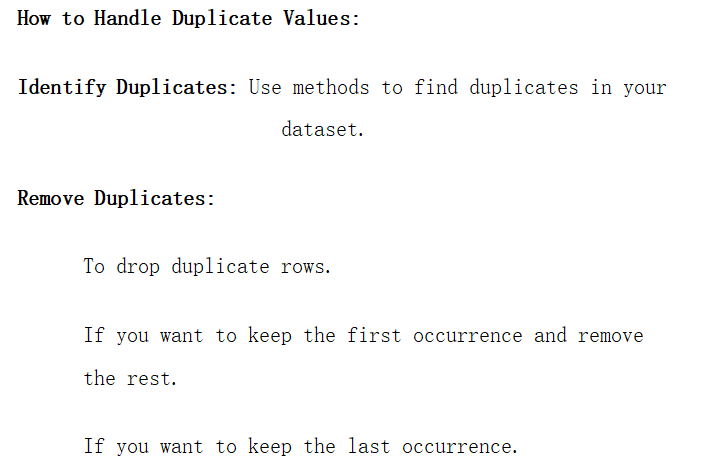

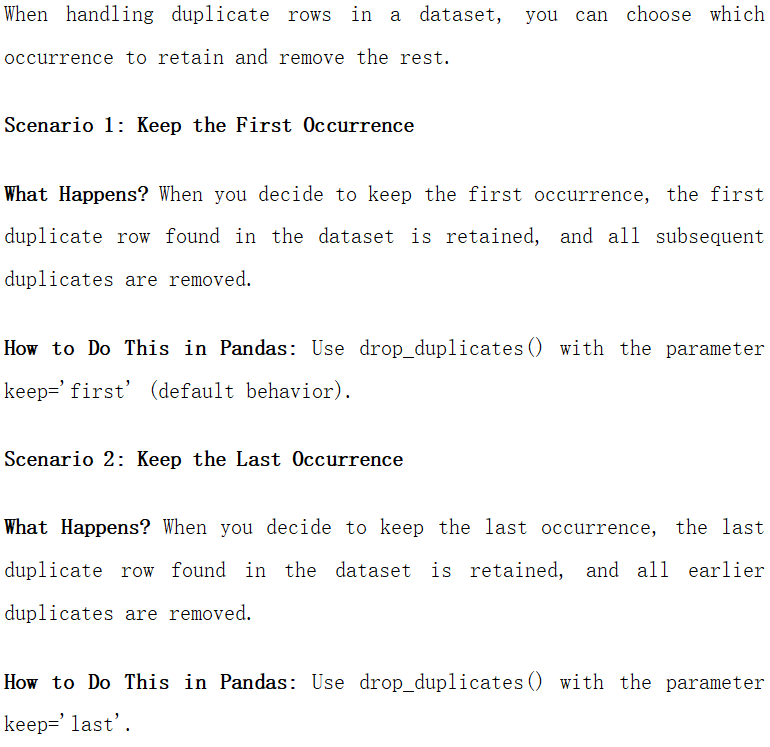